In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import matplotlib.pyplot as plt
print(tf.__version__)

2.1.0


In [3]:
dataset=pd.read_csv("PreProcessedTargetVolatilityHuobi2020_03_02_1000111111111111111.csv")
dataset["IsWeekend"].replace(to_replace=3.5821,value=1, inplace=True)
dataset=dataset.drop(["DateTime", "Hour"],axis=1)
dataset.head()

,ImpactSpreadDot1Deep,ImpactSpreadDot2Deep,ImpactSpreadDot5Deep,ImpactSpread1Deep,AskBidVolume,IsWeekend,Volatility5Seconds,Volatility10Seconds,Volatility30Seconds,Volatility1Minute,Volatility5Minutes,Volatility10Minutes,Volatility1Hour,Volatility1Day,VolatilityTargetFuture5Minutes
0,0.5536,0.8387,0.9150,0.8399,0.1417,0.0,0.2149,0.1444,0.2611,0.2326,0.3512,0.4061,0.5207,0.6107,0.9619
1,0.7046,0.7181,0.7733,0.8608,0.2211,0.0,1.2009,0.8652,0.6358,0.7567,0.9288,0.7127,0.5506,0.6192,0.5861
2,0.1132,0.1093,0.1030,0.1406,1.0744,0.0,0.1737,0.9302,0.6556,0.5046,0.4865,0.4565,0.5049,0.6671,0.6395
3,0.3575,0.3196,0.3205,0.4398,0.1773,0.0,0.1416,0.2649,0.2462,0.3031,0.5217,0.5813,0.4360,0.6845,0.4564
4,1.1927,1.2307,1.1040,0.9478,0.2335,0.0,0.6820,0.4629,0.3680,0.4874,0.4121,0.4766,0.4141,0.6295,0.7468


In [4]:
train_dataset=dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [5]:
print(train_dataset.shape)
print(test_dataset.shape)
train_dataset.head()

(5784, 15)
(1446, 15)


,ImpactSpreadDot1Deep,ImpactSpreadDot2Deep,ImpactSpreadDot5Deep,ImpactSpread1Deep,AskBidVolume,IsWeekend,Volatility5Seconds,Volatility10Seconds,Volatility30Seconds,Volatility1Minute,Volatility5Minutes,Volatility10Minutes,Volatility1Hour,Volatility1Day,VolatilityTargetFuture5Minutes
771,2.4269,2.1359,1.7076,1.4422,0.9538,0.0,1.9173,1.4260,0.9802,0.7964,0.6559,0.5767,0.7965,1.0980,0.6575
6616,0.0068,0.0059,0.8104,1.0192,0.3026,0.0,1.9322,1.3183,0.7755,0.6418,1.0086,0.8081,0.5436,0.7953,0.7857
4026,0.8158,0.9600,1.2808,1.2584,0.0910,1.0,0.5288,1.4879,0.8472,1.1138,0.6382,0.5360,0.7986,0.7694,0.6282
3083,0.0170,0.0256,0.3357,0.4212,0.1869,1.0,0.3757,0.2578,0.2046,0.2241,0.4248,0.3731,0.4192,0.3675,0.1897
5970,1.0244,0.9980,1.0108,0.8898,2.2029,0.0,0.0409,0.4056,0.5638,0.4891,0.8512,1.2391,1.1031,0.8322,0.6244


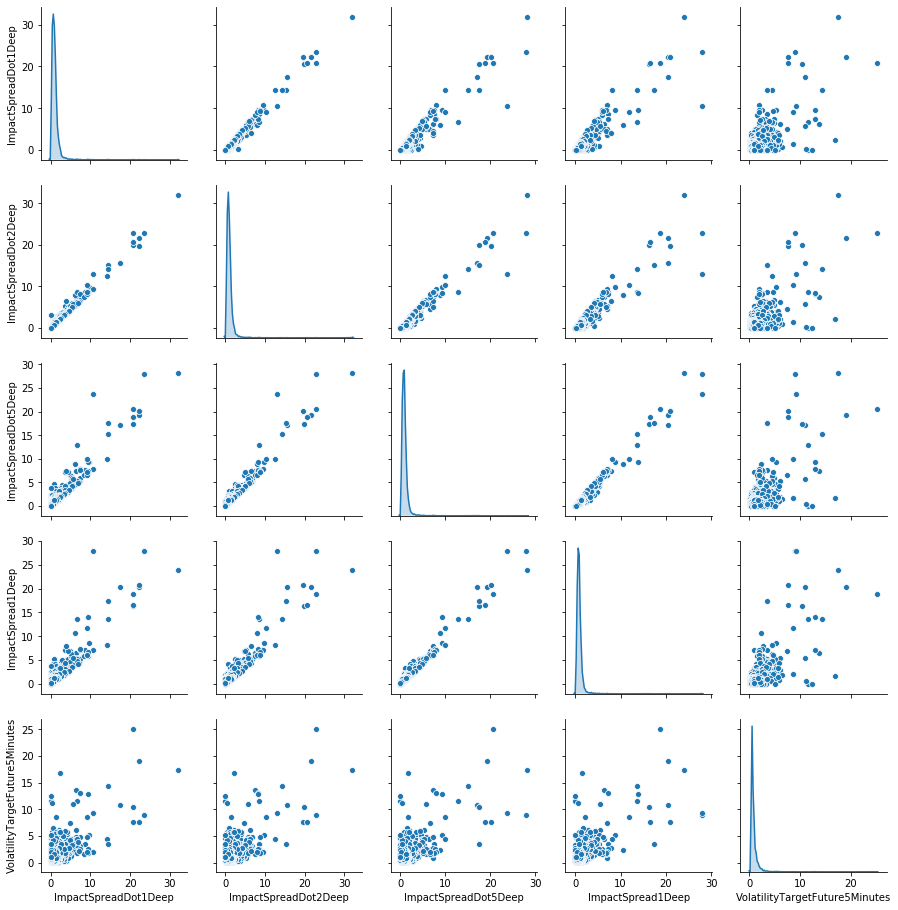

In [6]:
sns.pairplot(dataset[["ImpactSpreadDot1Deep","ImpactSpreadDot2Deep", "ImpactSpreadDot5Deep", "ImpactSpread1Deep", "VolatilityTargetFuture5Minutes"]],diag_kind="kde") 

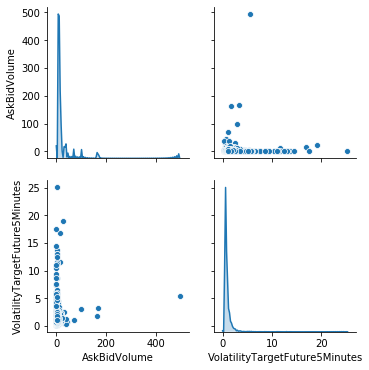

In [7]:
sns.pairplot(dataset[["AskBidVolume", "VolatilityTargetFuture5Minutes"]],diag_kind="kde") 

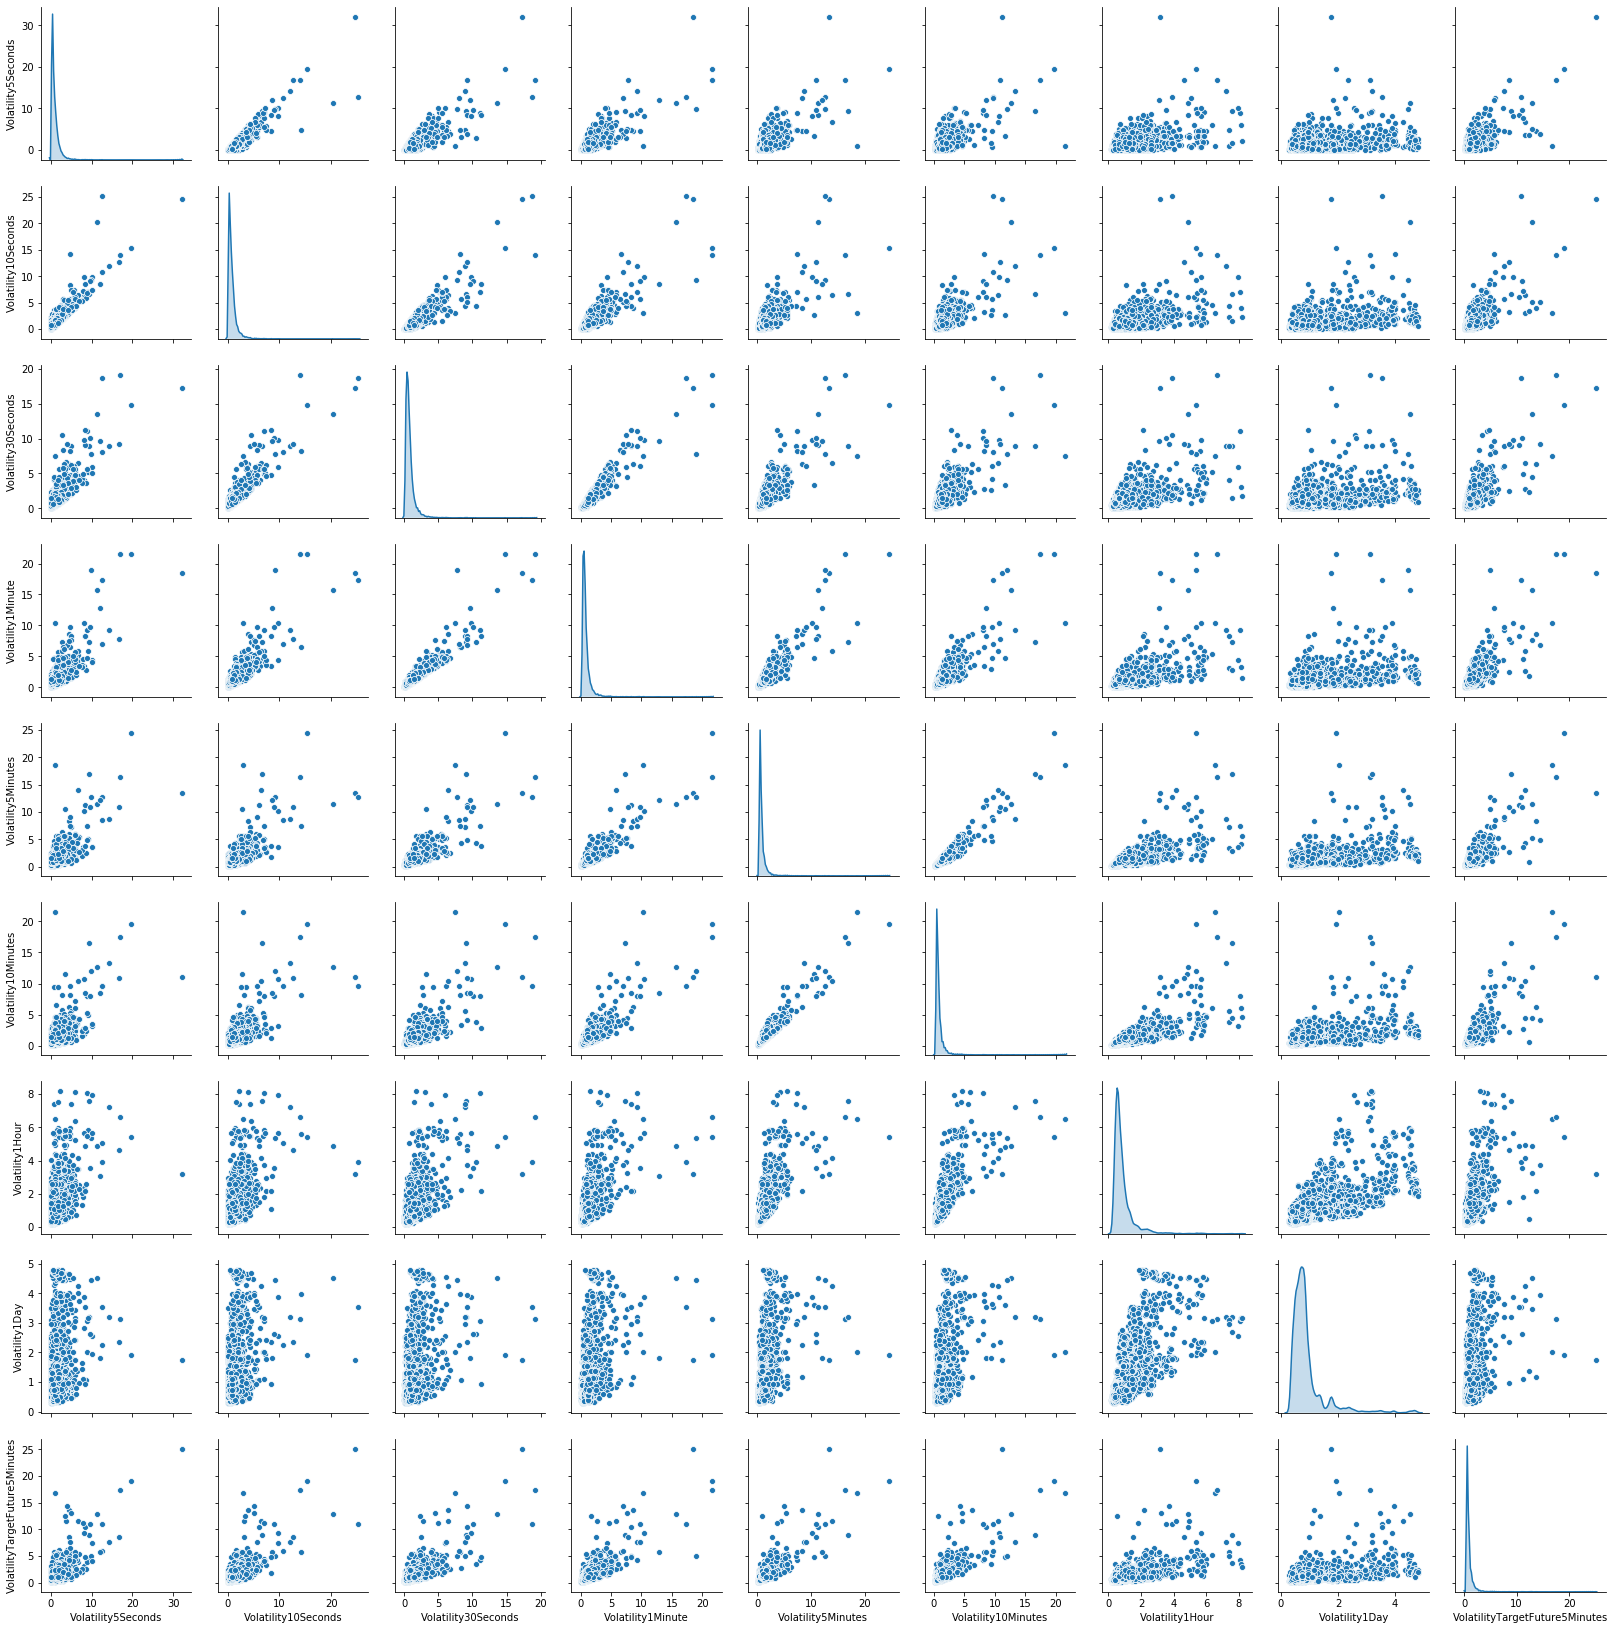

In [8]:
sns.pairplot(dataset[["Volatility5Seconds","Volatility10Seconds","Volatility30Seconds","Volatility1Minute","Volatility5Minutes","Volatility10Minutes","Volatility1Hour","Volatility1Day","VolatilityTargetFuture5Minutes"]],diag_kind="kde") 

# Learning Starts here

In [288]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('VolatilityTargetFuture5Minutes')
test_labels = test_features.pop('VolatilityTargetFuture5Minutes')

In [289]:
train_labels.head()

771     0.6575
6616    0.7857
4026    0.6282
3083    0.1897
5970    0.6244
Name: VolatilityTargetFuture5Minutes, dtype: float64

In [290]:
features=np.array(train_features[['ImpactSpreadDot1Deep','ImpactSpreadDot2Deep','AskBidVolume','Volatility5Seconds',
                                  'Volatility30Seconds','Volatility1Minute','Volatility5Minutes',
                                  'Volatility10Minutes','Volatility1Day']])

In [291]:
model=tf.keras.Sequential([
    layers.Dense(2048,activation="relu",input_shape=(9,)),
    layers.Dense(units=1)
])

model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 2048)              20480     
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 2049      
Total params: 22,529
Trainable params: 22,529
Non-trainable params: 0
_________________________________________________________________


In [292]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=.01),
    loss='mean_absolute_error')

In [ ]:
history=model.fit(
    train_features[['ImpactSpreadDot1Deep','ImpactSpreadDot2Deep','AskBidVolume','Volatility5Seconds','Volatility30Seconds',
                    'Volatility1Minute','Volatility5Minutes','Volatility10Minutes','Volatility1Day']], train_labels,
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

In [ ]:
# Only execute cell when you have one feature to train
def plot_graph(x, y):
    plt.scatter(train_features['Volatility10Minutes'], train_labels, label='Data')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel('Volatility10Minutes')
    plt.ylabel('Volatility Future 5 minutes')
    plt.legend()

In [ ]:
# Only execute cell when you have one feature to train
#x = tf.linspace(0.0, 50, 51)
#y = volTenMinModel.predict(x)
#plot_graph(x, y)

In [ ]:
predict=model.predict(test_features[["ImpactSpreadDot1Deep","ImpactSpreadDot2Deep", "AskBidVolume","Volatility5Seconds",
                                     "Volatility30Seconds","Volatility1Minute","Volatility5Minutes","Volatility10Minutes",
                                    "Volatility1Day"]]).flatten()

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels, predict)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 30]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
predict-test

In [ ]:
error = predict - test_labels.tolist()
plt.hist(error, bins=range(-5, 5))
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')